In [1]:
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo

In [2]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIG_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIG_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIG_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIG_SIZE)  # fontsize of the figure title

# Ex 7.6

## Part a

In [3]:
# Data
th_i = np.array([10,20,30,40,50,60,70,80])
th_r = np.array([8,15.5,22.5,29,35,40.5,45.5,50])
sigma = 0.5*np.ones_like(th_r)

# Convert to radians
th_i = np.pi*th_i/180
th_r = np.pi*th_r/180
sigma = np.pi*sigma/180

In [4]:
# Hypothesis 7.14
def h0(x, params):
    return params*x

# Hypothesis 7.14
def h1(x, params):
    return params[0]*x - params[1]*x**2

In [5]:
# Generic function to calculate chi2 given model and data
def chi2(model, params, ydata, xdata, yerr):
    
    res = (ydata - model(xdata, params))**2/yerr**2
    
    return np.sum(res)

In [6]:
# Compute chi2 for linear model
def chi2_h0(params):
    xdata = th_i
    ydata = th_r
    yerr = sigma
    
    return chi2(h0, params, ydata, xdata, yerr)

In [7]:
# Compute chi2 for quadratic model
def chi2_h1(params):
    xdata = th_i
    ydata = th_r
    yerr = sigma
    
    return chi2(h1, params, ydata, xdata, yerr)

### Linear model

In [22]:
spo.minimize?

Signature:
spo.minimize(
    fun,
    x0,
    args=(),
    method=None,
    jac=None,
    hess=None,
    hessp=None,
    bounds=None,
    constraints=(),
    tol=None,
    callback=None,
    options=None,
)
Docstring:
Minimization of scalar function of one or more variables.

Parameters
----------
fun : callable
    The objective function to be minimized::

        fun(x, *args) -> float

    where ``x`` is a 1-D array with shape (n,) and ``args``
    is a tuple of the fixed parameters needed to completely
    specify the function.

    Suppose the callable has signature ``f0(x, *my_args, **my_kwargs)``, where
    ``my_args`` and ``my_kwargs`` are required positional and keyword arguments.
    Rather than passing ``f0`` as the callable, wrap it to accept
    only ``x``; e.g., pass ``fun=lambda x: f0(x, *my_args, **my_kwargs)`` as the
    callable, where ``my_args`` (tuple) and ``my_kwargs`` (dict) have been
    gathered before invoking this function.
x0 : ndarray, shape (n,)
    Initia

In [25]:
# Minimising least-square for linear model
init_h0 = 1.
result_h0 = spo.minimize(chi2_h0, init_h0, method='Powell')
print(f'Linear model: alpha = {result_h0.x[0]:.3f}')

Linear model: alpha = 0.666


In [26]:
result_h0

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 134.64705882352933
       x: [ 6.662e-01]
     nit: 2
   direc: [[ 1.746e-10]]
    nfev: 84

In [27]:
# For plotting later
test_param = np.linspace(-5., 5., 20)

testchi2 = []
for this_param in test_param:
    testchi2.append(chi2_h0(this_param))

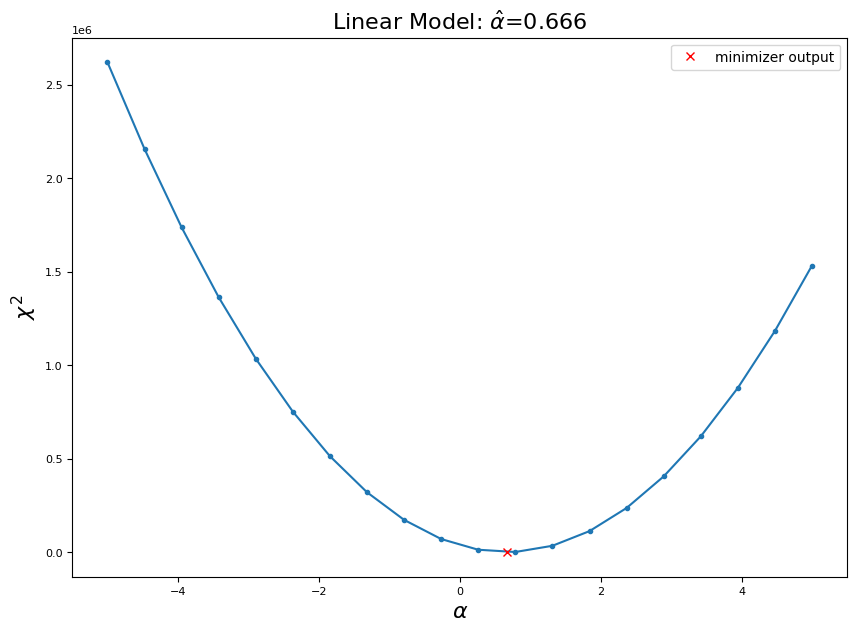

In [28]:
plt.figure(figsize=(10,7), facecolor='w')

plt.plot(test_param, testchi2, '.-')
plt.plot(result_h0.x, result_h0.fun, 'rx', label='minimizer output')

plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\chi^2$')
plt.title(fr'Linear Model: $\hat{{\alpha}}$={result_h0.x[0]:.3f}')
plt.legend()

Optimiser seems to be doing its job fairly well.

### Quadratic model

In [11]:
# Minimising least-square for linear model
init_h1 = np.array([1, -1])
result_h1 = spo.minimize(chi2_h1, init_h1, method='Powell')
print(f'Quadratic model: alpha = {result_h1.x[0]:.3f}, beta = {result_h1.x[1]:.3f}')

Quadratic model: alpha = 0.825, beta = 0.143


In [12]:
result_h1

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 2.6585670591724685e-25
       x: [ 8.250e-01  1.432e-01]
     nit: 3
   direc: [[ 0.000e+00  1.000e+00]
           [ 1.190e+00  1.007e+00]]
    nfev: 58

### Evaluating goodness-of-fit using reduced chi2

In [13]:
dof_h0 = len(th_i)-1 # estimated 1 parameter
dof_h1 = len(th_i)-2 # estimated 2 parameters

reduced_chi2_h0 = chi2_h0(result_h0.x)/dof_h0
reduced_chi2_h1 = chi2_h1(result_h1.x)/dof_h1

In [14]:
reduced_chi2_h0, reduced_chi2_h1

(np.float64(19.235294117647047), np.float64(4.4309450986207807e-26))

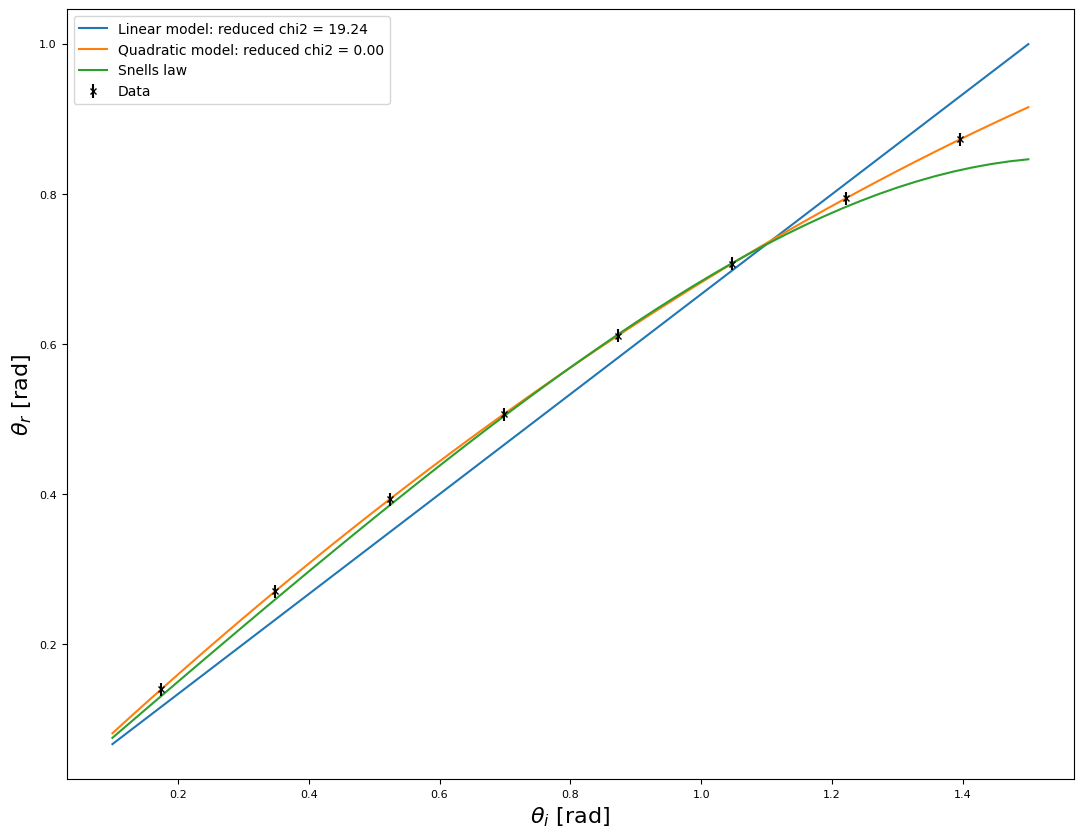

In [15]:
plt.figure(figsize=(13, 10), facecolor='w')

n_water = 1.333
n_air = 1.000293

test_i = np.linspace(0.1,1.5,50)
plt.plot(test_i, h0(test_i, result_h0.x), label=f'Linear model: reduced chi2 = {reduced_chi2_h0:.2f}')
plt.plot(test_i, h1(test_i, result_h1.x), label=f'Quadratic model: reduced chi2 = {reduced_chi2_h1:.2f}')
plt.plot(test_i, np.arcsin(n_air*np.sin(test_i)/n_water), label='Snell''s law')
plt.errorbar(th_i, th_r, yerr=sigma, c='k', marker='x', ms=5, linestyle='None', label='Data')

plt.xlabel(r'$\theta_i$ [rad]')
plt.ylabel(r'$\theta_r$ [rad]')
plt.legend()

Reduced chi2 for quadratic model is much less than 1 (4e-26) which means that the fit is much better than expected, given the errors on the angle of refraction. Essentially, overfitted.

Possible interpretations:
- Error of 0.5 deg is over-estimated. But not quite likely since 0.5 deg error is already quite a feat for ancient humans
- Assumption that errors are uncorrelated is not valid. But not sure which direction the correlation of errors affects the reduced chi2
- Something funky going on with the data. Perhaps Ptolemy tweaked the data to fit his favourite quadratic model...

## Part b

In [29]:
# Snell's law
# refractive index n = c/v
# r = n_r/n_i
# theta_r = arcsin(sin(theta_i)/r)
def h2(x, params):
    return np.arcsin(np.sin(x)/params)

In [30]:
# Compute chi2 for linear model
def chi2_h2(params):
    xdata = th_i
    ydata = th_r
    #yerr = sigma/0.5*0.7 # rescale errors to 0.7 deg, yeah can rescale like that even though radians.
    yerr = sigma
    
    return chi2(h2, params, ydata, xdata, yerr)

In [31]:
# Minimising least-square for Snell's law
init_h2 = 1.
result_h2 = spo.minimize(chi2_h2, init_h2, method='Powell')

# GOF
dof_h2 = len(th_i)-1 # estimated 1 parameter
reduced_chi2_h2 = chi2_h2(result_h2.x)/dof_h2

print(f'Snell\'s law(r truth = {n_water/n_air:.3f}): r estimate = {result_h2.x[0]:.3f}, \
chi2 = {result_h2.fun:.2f}, reduced chi2 = {reduced_chi2_h2:.2f}')

Snell's law(r truth = 1.333): r estimate = nan, chi2 = nan, reduced chi2 = nan


/tmp/ipykernel_5543/2260097177.py:6: RuntimeWarning: invalid value encountered in arcsin
  return np.arcsin(np.sin(x)/params)


Pretty good fit with Snell's law, but reduced chi2 is still not quite 1. Bad fits at large incident angles (cause Ptolemy fudged the data).

In [19]:
dof_h2

7

In [20]:
# assuming asymptoticity, calculating p-value
sps.chi2.sf(chi2_h2(result_h2.x),7) # 1-cdf

np.float64(nan)

In [21]:
5./100 # convention of rejecting h0 if p-value < 5%

0.05

If you have a bunch of independent Gaussian r.v., the MLE for the model parameters naturally take the form of least-squares. Read Cowan chapter 7.

Assuming Gaussian errors of 0.5 deg is probably not correct since the p-value under h0 is so low (ok but the data was fudged, and p-value is flat under the null). But you can fiddle around with the assumed error on the angle of refraction and see how the p-value and reduced chi2 change.